In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

/Users/keelia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sensor_list = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
               's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [3]:
def txt_process(path):
    txt = pd.read_csv(path, sep=" ", header=None)
    txt.drop(txt.columns[[26, 27]], axis=1, inplace=True)
    txt.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6',
                   's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
    return txt

In [4]:
train1 = txt_process('../Data/CMAPSSData/Train/train_FD001.txt')
train2 = txt_process('../Data/CMAPSSData/Train/train_FD002.txt')
train3 = txt_process('../Data/CMAPSSData/Train/train_FD003.txt')
train4 = txt_process('../Data/CMAPSSData/Train/train_FD004.txt')

test1 = txt_process('../Data/CMAPSSData/Test/test_FD001.txt')
test2 = txt_process('../Data/CMAPSSData/Test/test_FD002.txt')
test3 = txt_process('../Data/CMAPSSData/Test/test_FD003.txt')
test4 = txt_process('../Data/CMAPSSData/Test/test_FD004.txt')

In [5]:
def plot_sensor(s_name, data, s_id):
    # plt.plot(train1['cycle'], train1[s_name], 'bo', train2['cycle'], train2[s_name], 'bo', train3['cycle'], train3[s_name], 'bo', train4['cycle'], train4[s_name], 'bo',
    #          test1['cycle'], test1[s_name], 'bo', test2['cycle'], test2[s_name], 'bo', test3['cycle'], test3[s_name], 'bo', test4['cycle'], test4[s_name], 'bo', markersize=1)
    # group = data.groupby("id").get_group(1)
    # print(group)
    for i in range(100):
        group = data.groupby("id").get_group(i+1)
        plt.subplot(3,7,s_id)
        plt.plot(group['cycle']-400, group[s_name], "bo", markersize=1)
        plt.title("Sensor"+str(s_id))
#     plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


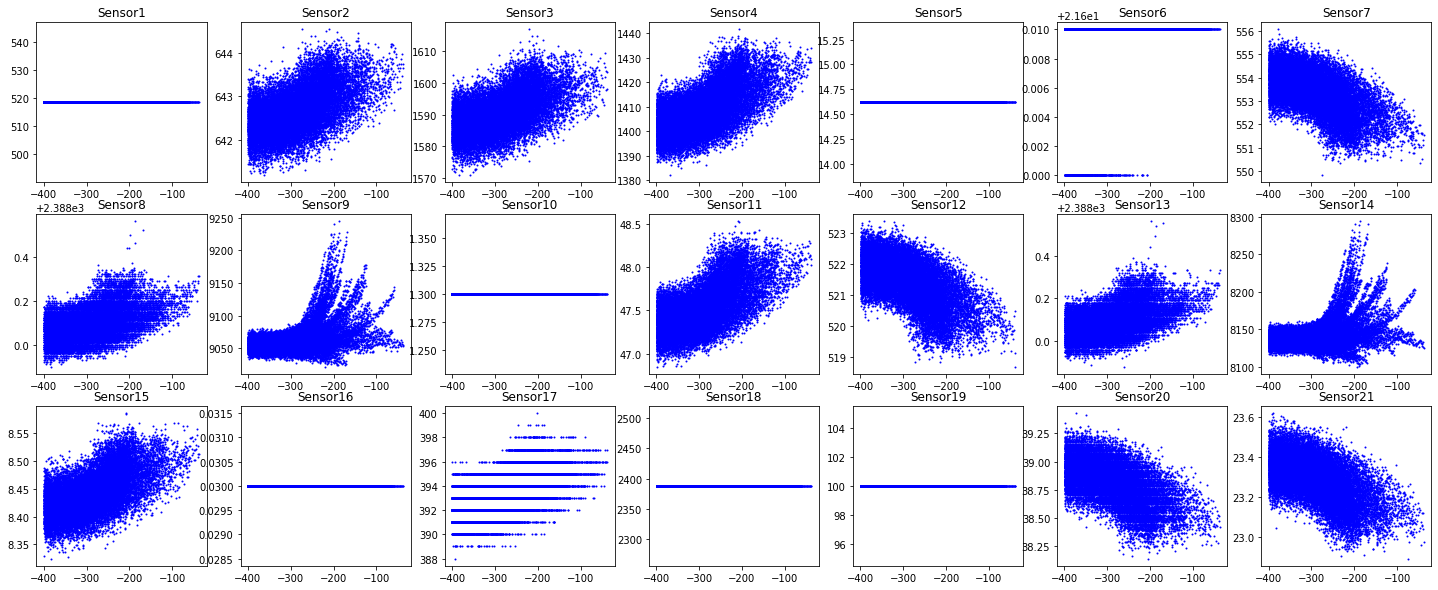

In [6]:
for i in range(len(sensor_list)):
    plot_sensor(sensor_list[i], train1, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train1_dot")
plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


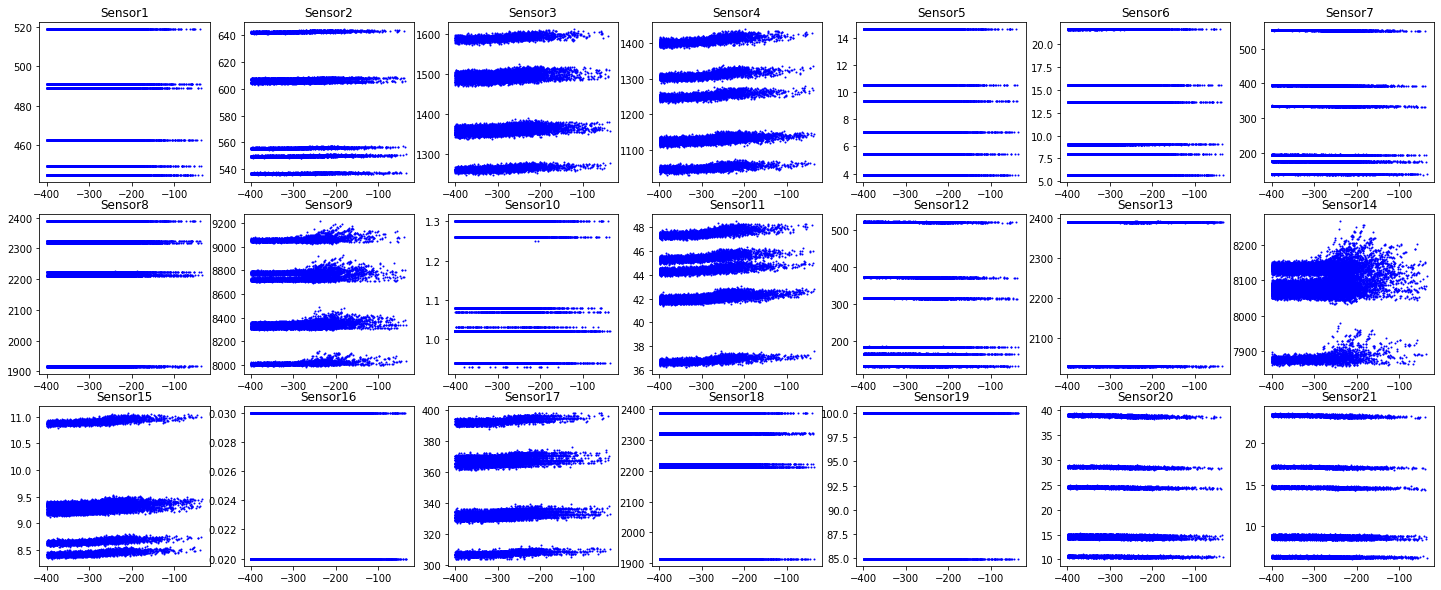

In [7]:
for i in range(len(sensor_list)):
    plot_sensor(sensor_list[i], train2, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train2_dot")
plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


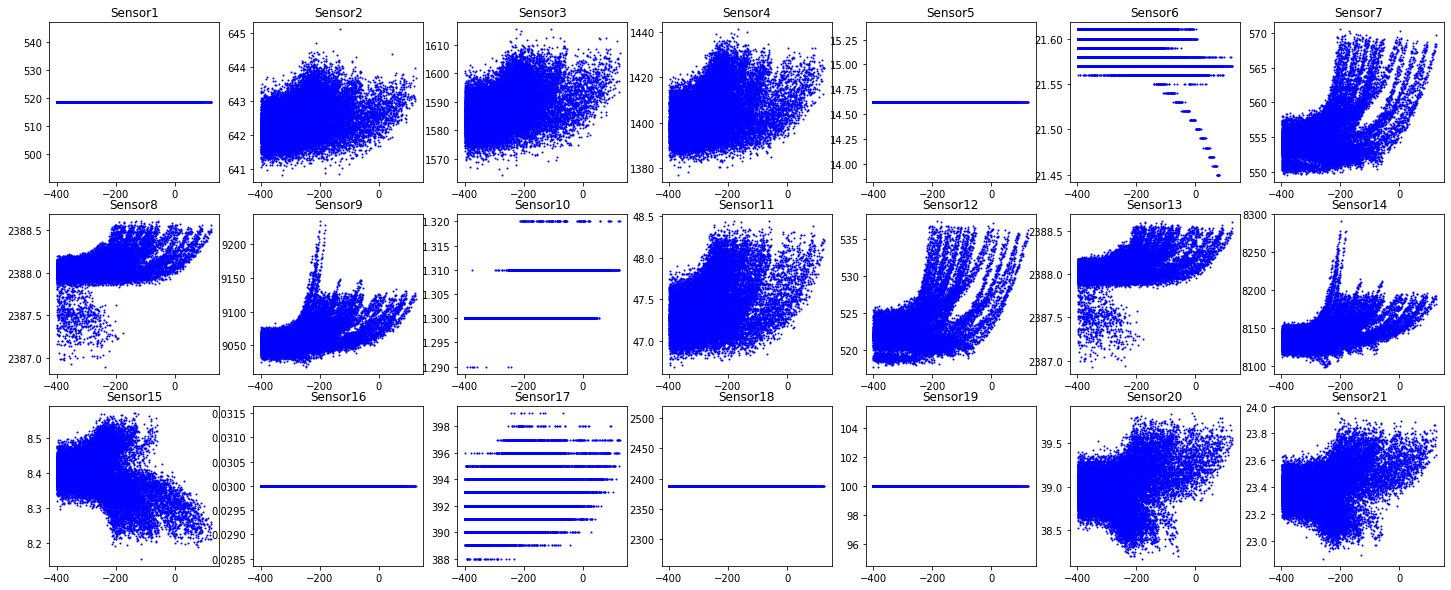

In [8]:
for i in range(len(sensor_list)):
    plot_sensor(sensor_list[i], train3, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train3_dot")
plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


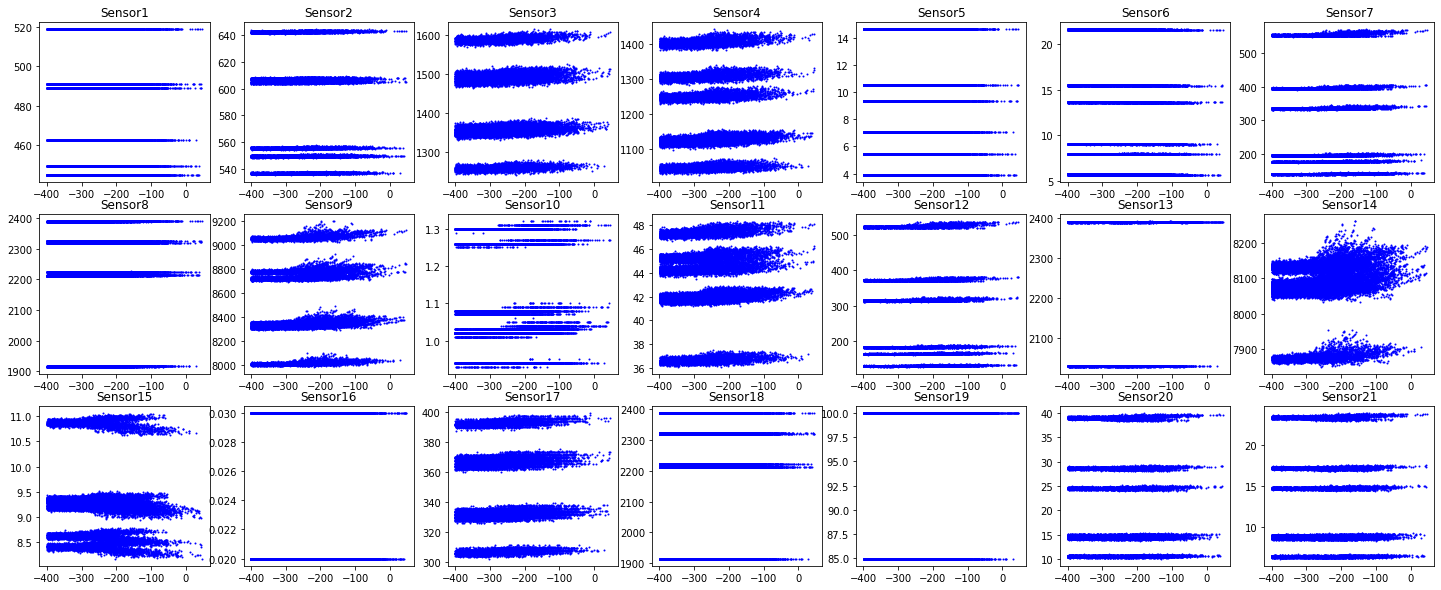

In [9]:
for i in range(len(sensor_list)):
    plot_sensor(sensor_list[i], train4, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("trian4_dot")
plt.show()

In [10]:
from matplotlib.ticker import FormatStrFormatter

def plot_sensor_trend(s_name, data, s_id):
    for i in range(100):
        group = data.groupby("id").get_group(i+1)
        x_ticks = np.arange(start=620548.00, stop=748383.00, step=18262.00)
        x_index = np.arange(len(group)) + 620548.00
        x = pd.DataFrame(group.cycle).set_index(x_index)
        group['cycle'] = pd.to_datetime(group['cycle']+1700, format='%Y')
        series = group[['cycle', s_name]].set_index('cycle')
#         print (series)
#         print ("Id: ", i)
        result = seasonal_decompose(series, model='additive', freq=1)
#         fig, ax = plt.subplots()
        plt.subplot(3,7,s_id)
        plt.plot(result.trend, "b")
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.gca().xaxis.set_minor_formatter(FormatStrFormatter('%.2f'))
        plt.xticks(rotation=90)
        plt.xticks(x_ticks, (x.cycle-1)*50-400)
        plt.title("Sensor"+str(s_id))
#     plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


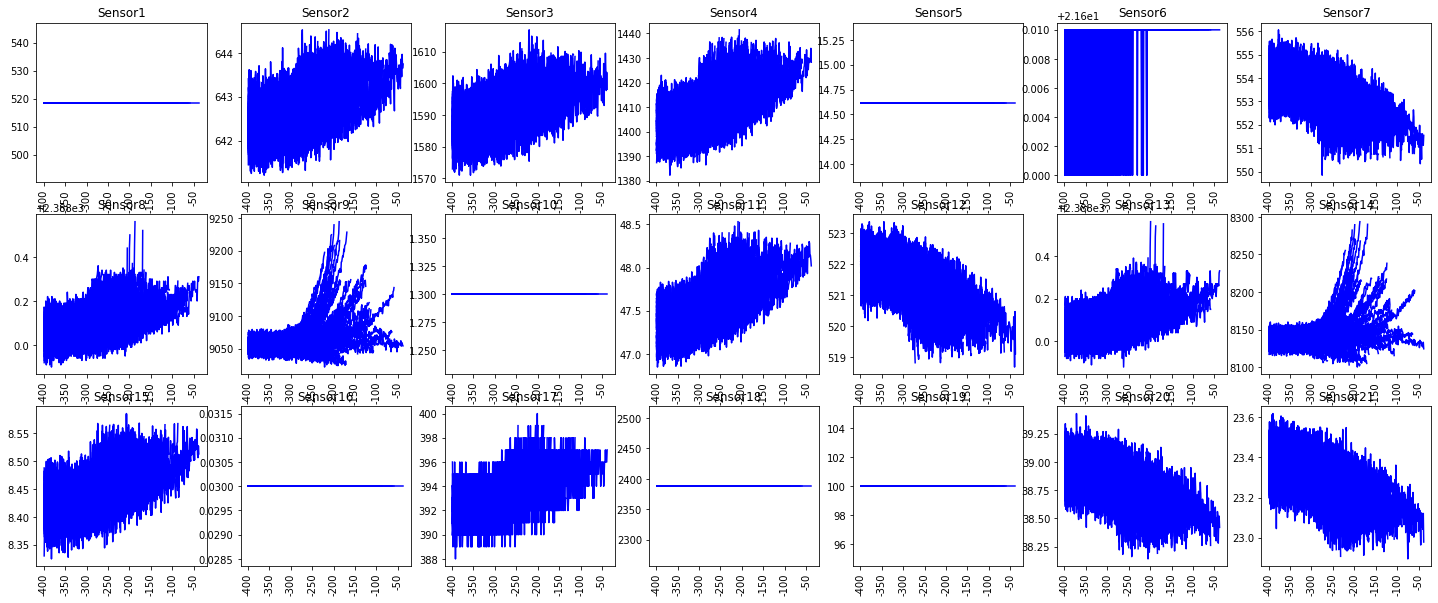

In [11]:
for i in range(len(sensor_list)):
    plot_sensor_trend(sensor_list[i], train1, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train1_trend")
plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


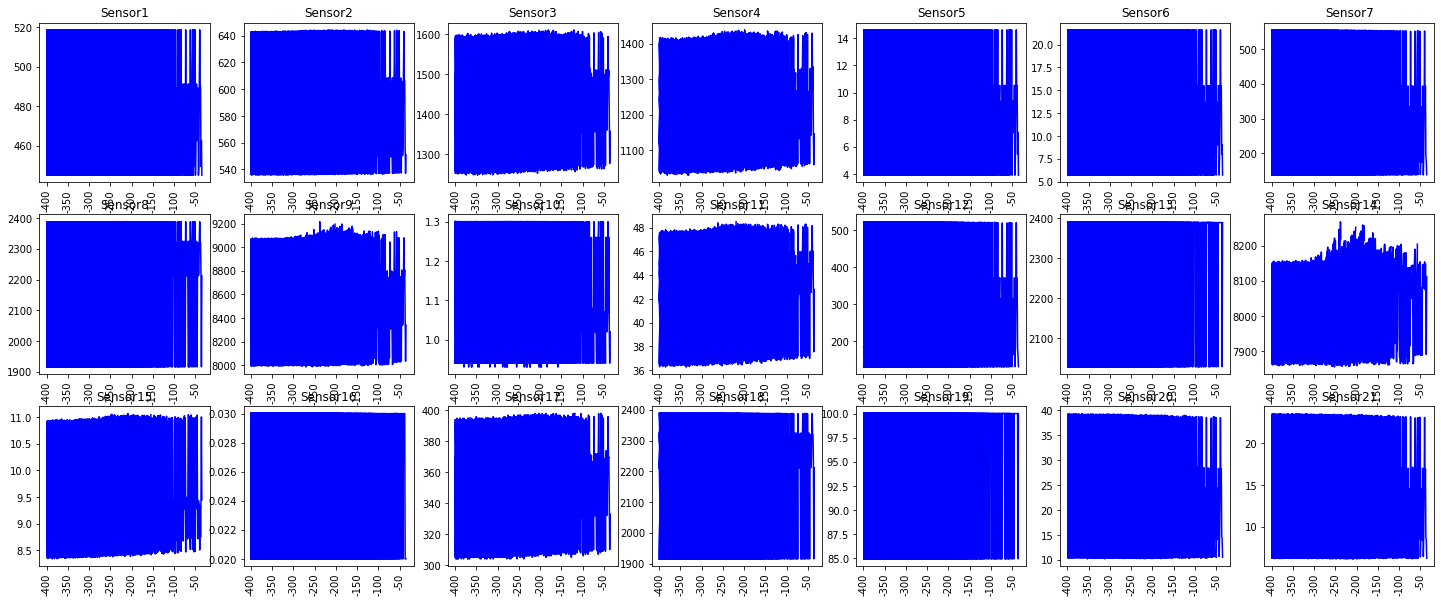

In [12]:
for i in range(len(sensor_list)):
    plot_sensor_trend(sensor_list[i], train2, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train2_trend")
plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


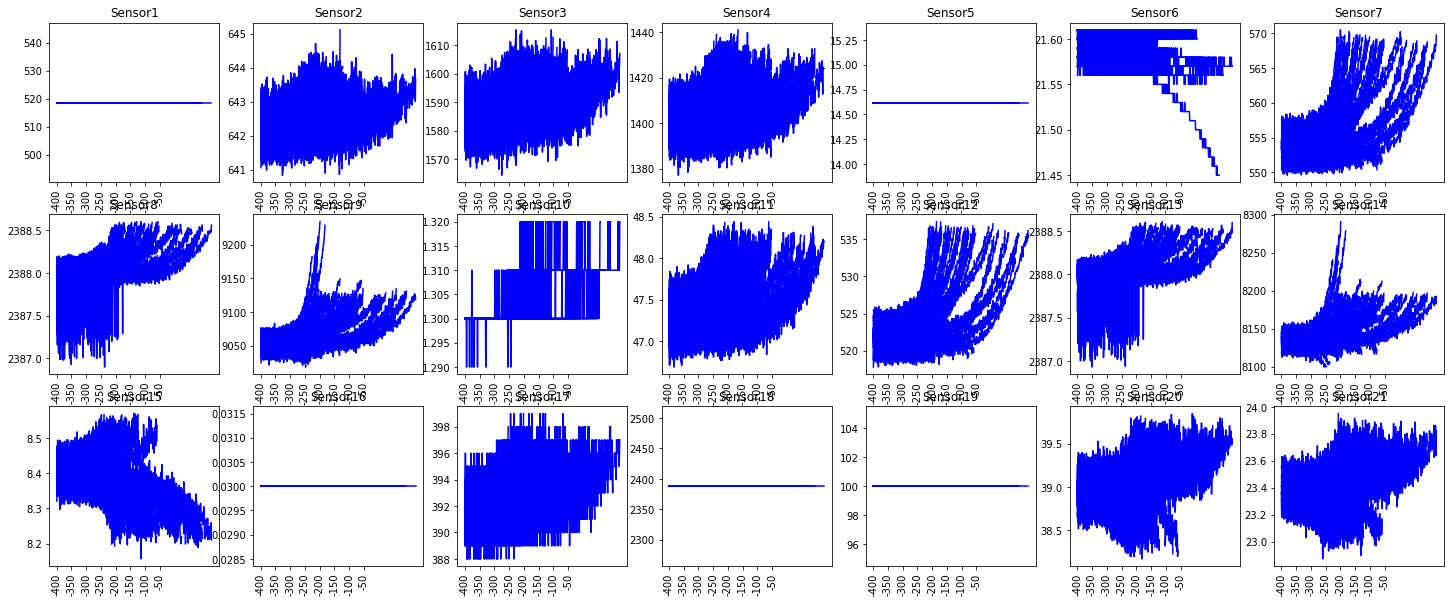

In [13]:
for i in range(len(sensor_list)):
    plot_sensor_trend(sensor_list[i], train3, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train3_trend")
plt.show()

/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/keelia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


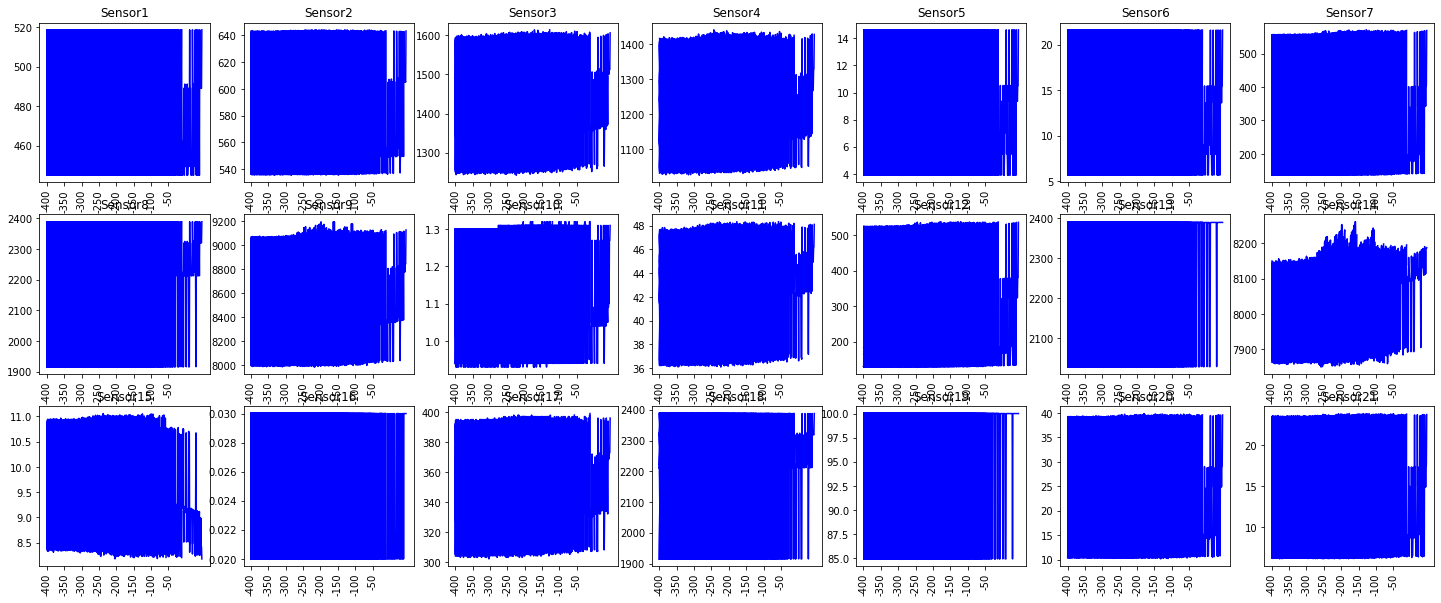

In [14]:
for i in range(len(sensor_list)):
    plot_sensor_trend(sensor_list[i], train4, i+1)
# plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.savefig("train4_trend")
plt.show()